# Applied Text and Natural Language Analytics, Fall 2020

### Assignment 4

Submitted by - 
Harsh Dhanuka, hd2457

## 1. Pick a random news article (preferably with many entity mentions) from your Webhose dataset (provided earlier in Assignment 2)

I am selecting the 'Netflix' dataset from  Assignment 2 for the analysis.

The random news article from this dataset is: http://omgili.com/ri/.wHSUbtEfZSCvFgWhG.N__Y_kk6rEaYdjsrpI1bEeKktgDgldQ2s_6MRmlv4jK7fMNVEhQqU4EXb61rVFualijBYg7orEsJZJyBrzqNk1FQ_2z6DFSGmxcGnRpX.EB__lgRE2mriFDCyaZoJ1tyJAvD8XG37Dct6_XhBQCreko_WuncGLV.lltj.I7NCcFr0  

This site now automatically redirects to the link - https://www.stuff.co.nz/entertainment/entertainment-top-stories/300026292/judge-gives-control-of-tiger-king-joe-exotics-zoo-to-carole-baskin 

I will use this new link for my analysis.

## 2. Follow directions to set up one of the Information Extraction services below, and write a Python program implementing API calls to extract Company/Organization and Geo entities from  the article chosen in Step 1:

I will be using the `IBM Watson NLU` tool to perform the API call and extract the required entities

In [1]:
import json

from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions

import spacy
from spacy.gold import docs_to_json
from spacy.util import minibatch, compounding
from spacy.pipeline import SentenceSegmenter
import random

import urllib.request as url

from bs4 import BeautifulSoup
from bs4.element import Comment

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define 

link = 'https://www.stuff.co.nz/entertainment/entertainment-top-stories/300026292/judge-gives-control-of-tiger-king-joe-exotics-zoo-to-carole-baskin'

In [3]:
authenticator = IAMAuthenticator('hZoHwqiv8lmnO5iqC7vCMHYfJeeZSMxNPj8pQu0gLZdP')
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2020-08-01',
    authenticator=authenticator
)

# Obtained from the IBM Cloud account
natural_language_understanding.set_service_url('https://api.us-east.natural-language-understanding.watson.cloud.ibm.com/instances/da45734b-7911-438e-8603-b14389386d9d')

response = natural_language_understanding.analyze(
    url = link,
    features = Features(entities = EntitiesOptions(mentions = False, sentiment = False, limit = 10))).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 1581,
    "features": 1
  },
  "retrieved_url": "https://www.stuff.co.nz/entertainment/entertainment-top-stories/300026292/judge-gives-control-of-tiger-king-joe-exotics-zoo-to-carole-baskin",
  "language": "en",
  "entities": [
    {
      "type": "Person",
      "text": "Joe Exotic",
      "relevance": 0.955086,
      "count": 5,
      "confidence": 0.99976
    },
    {
      "type": "Company",
      "text": "Big Cat Rescue Corporation",
      "relevance": 0.333057,
      "count": 2,
      "confidence": 0.535277
    },
    {
      "type": "Person",
      "text": "Scott Palk",
      "relevance": 0.311141,
      "count": 1,
      "confidence": 0.757238
    },
    {
      "type": "Person",
      "text": "Maldonado",
      "relevance": 0.309414,
      "count": 4,
      "confidence": 1
    },
    {
      "type": "Person",
      "text": "Joseph Maldonado",
      "relevance": 0.295702,
      "count": 1,
      "confidence": 0.989706
 

### Alternate Method: `SpaCY`

In [4]:
html = url.urlopen(link)
raw = html.read()

In [5]:
# Using the code provided by lecturer in Module 3 class excercise to parse text from a web or .html article

def tag_visible(element):
    if element.parent.name in ['style', 'script', 
                               # 'head', 'title', 
                               'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

text = text_from_html(raw)
print(text[:1000])

                           Judge gives control of 'Tiger King' Joe Exotic's zoo to Carole Baskin | Stuff.co.nz           news National World Coronavirus Climate Change Politics Business prosper Farming Technology Sport Rugby voices & in depth perspectives Pou Tiaki Spotlight Stuff Nation Cartoons KEA Kids News living Travel Homed Life & Style Entertainment bravo Motoring Food & Wine Oddstuff regions northland Auckland Waikato Bay of Plenty Taranaki hawke's bay manawatu wellington nelson marlborough canterbury south cantebury otago southland more Weather Quizzes Puzzles Newsletters about stuff contribute Advertising Careers Privacy Contact stuff family Play Stuff neighbourly mags4gifts stuff events stuff coupons Entertainment Entertainment Top Stories One new Covid-19 case in managed isolation ... read more Judge gives control of 'Tiger King' Joe Exotic's zoo to Carole Baskin 08:27, Jun 03 2020 Facebook Twitter Whats App Reddit Email A federal judge in Oklahoma has awarded ownership of 

In [6]:
nlp = spacy.load("en_core_web_sm")

# Parse through text from webpage into a spacy nlp
page = nlp(text)

In [7]:
# Entity label in spacy for company/organization and geo entities
entity_labels = ['ORG', 'GPE']

# Extract companies and geo entities from the article
orgs = []
geos = []
for entity in page.ents:
    if entity.label_ == 'ORG':
        orgs.append(entity.text)
    elif entity.label_ == 'GPE':
        geos.append(entity.text)
    else:
        continue

print(" ")        
print("Below is a list of all companies/organizations referenced in the article:")
print(" ")
print(set(orgs))
print(" ")
print("Below is a list of all geo entities referenced in the article:")
print(" ")
print(set(geos))

 
Below is a list of all companies/organizations referenced in the article:
 
{'Palk', 'Motoring Food & Wine Oddstuff', 'Maldonado-Passage', 'Joe Exotic', 'Big Cat Rescue Corporation', 'Twitter', 'Travel Homed Life & Style Entertainment', 'AP', 'MasterChef Australia Wife', "Maldonado-Passage's", 'Domino', 'Kmart', 'National World Coronavirus Climate Change Politics Business prosper Farming Technology Sport Rugby voices &', "Joe Exotic's", 'Tiger King', 'Entertainment Entertainment Top Stories'}
 
Below is a list of all geo entities referenced in the article:
 
{'Netflix', 'Florida', 'Oklahoma', 'Texas', 'Fort Worth', 'US', 'Maldonado', 'Samoa', 'mags4gifts', 'Australia'}


## 3.  Use the Class Exercise Jupyter Notebook (SpaCy NER) as a reference to:

In [8]:
# spacy models must be downloaded - run 'python -m spacy download en_core_web_sm' in terminal if this fails
nlp = spacy.load("en_core_web_sm")

### 1. !pip install spacy 

In [9]:
# Action performed in the terminal window

# pip install spacy 

### 2. Update TRAIN_DATA with annotations of entities (PERSON, LOCATION, or ORGANIZATION) from each sentence in the article selected in step 1

#### Extract the sentences from the article, to annotate the entities in the Train_Data

In [10]:
# We have to use the .sents method, to extract the text in the approproate SpaCY nlp format
# 'page' is the raw SpaCY nlp text we defined earlier

sentences = [sentence for sentence in page.sents]
sentences[2]

living Travel Homed Life & Style Entertainment bravo Motoring Food & Wine Oddstuff regions northland Auckland Waikato Bay of Plenty Taranaki hawke's bay manawatu wellington nelson marlborough canterbury south cantebury otago southland more Weather Quizzes Puzzles Newsletters about stuff contribute Advertising Careers

#### Create a function to extract the entities from each sentence

Standard annotations taken from https://spacy.io/api/annotation#named-entities

In [11]:
required_entities = ['PERSON', 'GPE', 'ORG']

def extractEntity(sentence, entities):
    ents = []
    for ent in sentence.ents:
        if ent.label_ in entities:
            ents.append((ent.start_char, ent.end_char, ent.label_))
        else:
            continue
    return (str(sentence), {'entities': ents})

#### Pass the function, and check

In [12]:
print(extractEntity(sentences[1], required_entities))
print(" ")
print(extractEntity(sentences[2], required_entities))

('National World Coronavirus Climate Change Politics Business prosper Farming Technology Sport Rugby voices & in depth perspectives Pou Tiaki Spotlight Stuff Nation Cartoons KEA Kids News', {'entities': [(126, 233, 'ORG')]})
 
("living Travel Homed Life & Style Entertainment bravo Motoring Food & Wine Oddstuff regions northland Auckland Waikato Bay of Plenty Taranaki hawke's bay manawatu wellington nelson marlborough canterbury south cantebury otago southland more Weather Quizzes Puzzles Newsletters about stuff contribute Advertising Careers", {'entities': [(319, 358, 'ORG'), (365, 394, 'ORG'), (444, 452, 'PERSON')]})


#### Build the Train Set

In [13]:
TRAIN_DATA = []

for sentence in sentences:
    TRAIN_DATA.append(extractEntity(sentence, required_entities))

In [14]:
TRAIN_DATA

[("                           Judge gives control of 'Tiger King' Joe Exotic's zoo to Carole Baskin | Stuff.co.nz           news",
  {'entities': [(51, 62, 'PERSON'), (63, 75, 'PERSON'), (83, 96, 'PERSON')]}),
 ('National World Coronavirus Climate Change Politics Business prosper Farming Technology Sport Rugby voices & in depth perspectives Pou Tiaki Spotlight Stuff Nation Cartoons KEA Kids News',
  {'entities': [(126, 233, 'ORG')]}),
 ("living Travel Homed Life & Style Entertainment bravo Motoring Food & Wine Oddstuff regions northland Auckland Waikato Bay of Plenty Taranaki hawke's bay manawatu wellington nelson marlborough canterbury south cantebury otago southland more Weather Quizzes Puzzles Newsletters about stuff contribute Advertising Careers",
  {'entities': [(319, 358, 'ORG'), (365, 394, 'ORG'), (444, 452, 'PERSON')]}),
 ('Privacy Contact stuff family Play Stuff neighbourly mags4gifts stuff events stuff coupons Entertainment Entertainment Top Stories',
  {'entities': [(683, 6

### 3. run spaCy_NER function to generate trained_nlp model

#### Define a NER training model

In [15]:
import matplotlib.pyplot as plt

def plot_loss_history(loss_history):
    f, ax = plt.subplots(1, 1, figsize=(12, 8)) # set the size of figures for plots
    plt.plot(loss_history)
    plt.xlabel('Iteration').set_fontsize(20)
    plt.ylabel('Loss value').set_fontsize(20)
    plt.show()
    return

Starting iteration 0
{'ner': 149.97165184100174}
Starting iteration 1
{'ner': 5.999999643022408}
Starting iteration 2
{'ner': 19.96105406121429}
Starting iteration 3
{'ner': 6.473014154945285}
Starting iteration 4
{'ner': 7.372828875289653}
Starting iteration 5
{'ner': 4.875220950842314}
Starting iteration 6
{'ner': 8.277321536607026}
Starting iteration 7
{'ner': 5.652954541259859}
Starting iteration 8
{'ner': 11.335524132586226}
Starting iteration 9
{'ner': 8.079724511241578}
Starting iteration 10
{'ner': 18.717978137201083}
Starting iteration 11
{'ner': 8.489483396385264}
Starting iteration 12
{'ner': 16.393554230790695}
Starting iteration 13
{'ner': 15.388531106519745}
Starting iteration 14
{'ner': 10.456766723536616}


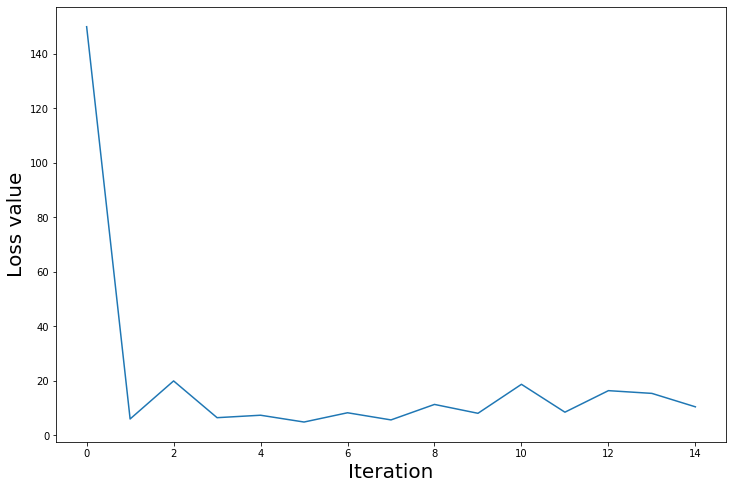

In [16]:
def train_spacy(data,iterations):
    TRAIN_DATA = data
    nlp = spacy.blank('en')  # create blank Language class
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    
    # Add NER trainer to pipe
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)
       

    # add labels
    for _, annotations in TRAIN_DATA:
         for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    # Disable all other pipes and just train NER
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        loss_history = []
        for itn in range(iterations):
            #if not itn % 5:
            print("Starting iteration " + str(itn))
            random.shuffle(TRAIN_DATA)
            losses = {}
            for text, annotations in TRAIN_DATA:
                nlp.update(
                    [text],  # batch of texts
                    [annotations],  # batch of annotations
                    drop=0.2,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            print(losses)
            loss_history.append(losses['ner'])
    plot_loss_history(loss_history)
    return nlp

prdnlp = train_spacy(TRAIN_DATA, 15)

### 4. use trained_nlp to test entity recognition on another random news article from Webhose and print results to output

For this, I will use the second article from the same webhose dataset of 'Netflix'

The link is: 'https://www.stuff.co.nz/entertainment/tv-radio/300026661/13-reasons-why-the-popular-netflix-shows-creator-teases-chance-of-a-hopeful-ending'

In [17]:
# Get all body text from another webpage from webhose dataset from above
link2 = 'https://www.stuff.co.nz/entertainment/tv-radio/300026661/13-reasons-why-the-popular-netflix-shows-creator-teases-chance-of-a-hopeful-ending'

html2 = url.urlopen(link2).read()
text2 = text_from_html(html2)
print(text2[:1000])

                           13 Reasons Why: The popular Netflix show's creator teases chance of a hopeful ending  | Stuff.co.nz           news National World Coronavirus Climate Change Politics Business prosper Farming Technology Sport Rugby voices & in depth perspectives Pou Tiaki Spotlight Stuff Nation Cartoons KEA Kids News living Travel Homed Life & Style Entertainment bravo Motoring Food & Wine Oddstuff regions northland Auckland Waikato Bay of Plenty Taranaki hawke's bay manawatu wellington nelson marlborough canterbury south cantebury otago southland more Weather Quizzes Puzzles Newsletters about stuff contribute Advertising Careers Privacy Contact stuff family Play Stuff neighbourly mags4gifts stuff events stuff coupons Entertainment TV & Radio One new Covid-19 case in managed isolation ... read more 13 Reasons Why: The popular Netflix show's creator teases chance of a hopeful ending 14:49, Jun 03 2020 Facebook Twitter Whats App Reddit Email NETFLIX The final season of 13 Reason

#### Run the trained model

In [18]:
doc = prdnlp(text2)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [19]:
# test the trained model
for text, _ in TRAIN_DATA:
    doc = nlp(text2)
    print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
#    print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities [('13', 'CARDINAL'), ('Netflix', 'LOC'), ('National World Coronavirus Climate Change Politics Business prosper Farming Technology Sport Rugby voices &', 'ORG'), ('Travel Homed Life & Style Entertainment', 'ORG'), ('Motoring Food & Wine Oddstuff', 'ORG'), ('Auckland Waikato Bay', 'LOC'), ('Taranaki', 'PERSON'), ('bay manawatu', 'FAC'), ('Weather Quizzes Puzzles Newsletters', 'WORK_OF_ART'), ('mags4gifts', 'GPE'), ('13', 'CARDINAL'), ('Netflix', 'PRODUCT'), ('14:49', 'TIME'), ('Jun', 'PERSON'), ('13', 'CARDINAL'), ('fourth and final season', 'DATE'), ('Netflix', 'PERSON'), ('Friday', 'DATE'), ('Brian Yorkey', 'PERSON'), ("Jay Asher's", 'PERSON'), ('2007', 'DATE'), ('Netflix', 'ORG'), ('2017', 'DATE'), ('the first season', 'DATE'), ('Hannah Baker', 'PERSON'), ('17-year-old', 'DATE'), ('American', 'NORP'), ('2019', 'DATE'), ('Netflix', 'PERSON'), ("the first season's", 'DATE'), ('each season', 'DATE'), ('four', 'CARDINAL'), ('13', 'CARDINAL'), ('Netflix', 'GPE'), ('Friday', 'DATE'